In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
executable_path = {'executable_path': 'C:/Users/astor/OneDrive/Desktop/chromedriver.exe'}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

In [4]:
# Create a Beautiful Soup Object
mars_html = browser.html
mars_planet = soup(mars_html, 'html.parser')
mars_planet

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

In [7]:
# Extract all rows of data
mars_temp = mars_planet.find('table')
mars_temp

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

In [8]:
# Create an empty list
mars_temp_list = []
# Loop through the scraped data to create a list of rows

In [9]:
for header in mars_temp.find_all('th'):
    head = header.text
    mars_temp_list.append(head)
print(mars_temp_list)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']


In [10]:
mars_temp_rows = []

for record in mars_temp.find_all('tr'):
    table_data = record.find_all('td')
    row = [record.text for record in table_data]
    mars_temp_rows.append(row)
mars_temp_df = pd.DataFrame(mars_temp_rows)
mars_temp_df.columns = mars_temp_list
mars_df = pd.DataFrame(mars_temp_df).tail(-1)
mars_df.head()

id terrestrial_date sol   ls month min_temp pressure
1   2       2012-08-16  10  155     6    -75.0    739.0
2  13       2012-08-17  11  156     6    -76.0    740.0
3  24       2012-08-18  12  156     6    -76.0    741.0
4  35       2012-08-19  13  157     6    -74.0    732.0
5  46       2012-08-20  14  157     6    -74.0    740.0

In [27]:
# Examine data type of each column
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [28]:
# Change data types for data analysis
mars_cols = [col for col in mars_df.columns]

for col in mars_cols:    
    mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
    mars_df['sol'] = pd.to_numeric(mars_df['sol'])
    mars_df['ls'] = pd.to_numeric(mars_df['ls'])
    mars_df['month'] = pd.to_numeric(mars_df['month'])
    mars_df['min_temp'] = mars_df['min_temp'].astype('float64') 
    mars_df['pressure'] = mars_df['pressure'].astype('float64') 

In [29]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [38]:
# 1. How many months are there on Mars?
mars_df["month"].value_counts().sort_index()

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [57]:
# 2. How many Martian days' worth of data are there?
martian_days_count = mars_df['sol'].max()
martian_days_count

1977

In [40]:
# 3. What is the average low temperature by month?
mars_temp_df = pd.DataFrame(mars_df.groupby('month')['min_temp'].mean())
mars_temp_df.columns.values

array(['min_temp'], dtype=object)

Text(0, 0.5, 'Temperature in Celcius')

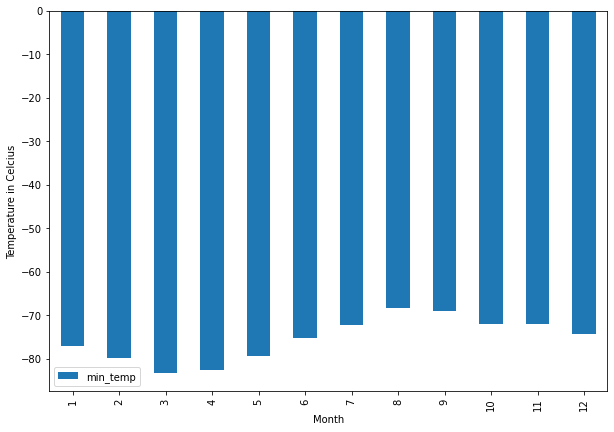

In [41]:
# Plot the average temperature by month
mars_temp_df.plot.bar(y="min_temp",rot=90,figsize=(10,7))
plt.xlabel("Month")
plt.ylabel("Temperature in Celcius")

Text(0, 0.5, 'Temperature in Celcius')

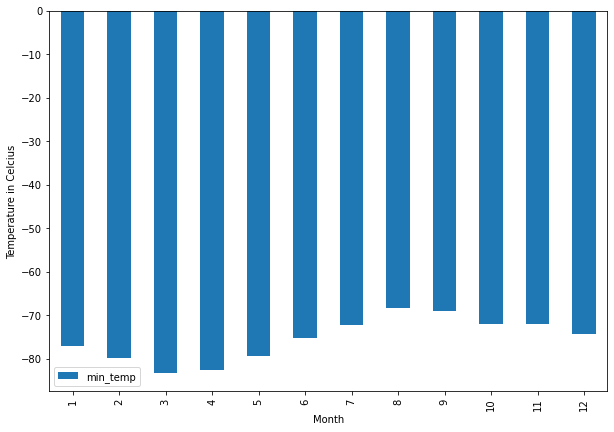

In [42]:
# Identify the coldest and hottest months in Curiosity's location
mars_temp_df.plot.bar(y="min_temp",rot=90,figsize=(10,7))
plt.xlabel("Month")
plt.ylabel("Temperature in Celcius")

In [35]:
# 4. Average pressure by Martian month
mars_pres_df = pd.DataFrame(mars_df.groupby('month')['pressure'].mean())
mars_pres_df.columns.values

array(['pressure'], dtype=object)

Text(0, 0.5, 'Atmospheric Pressure')

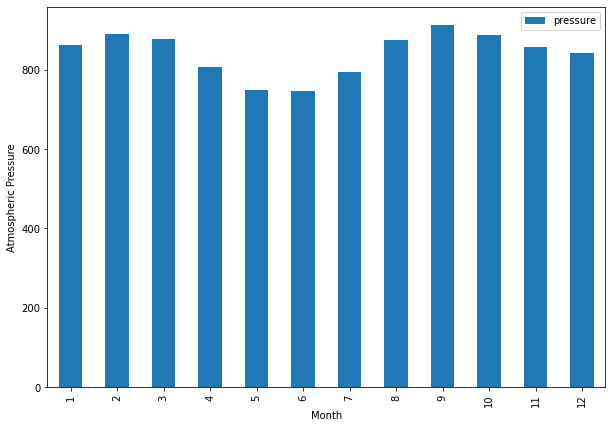

In [43]:
# Plot the average pressure by month
mars_pres_df.plot.bar(y="pressure",rot=90,figsize=(10,7))
plt.xlabel("Month")
plt.ylabel("Atmospheric Pressure")

In [60]:
# 5. How many terrestrial (earth) days are there in a Martian year?
#Consider how many days elapse on Earth in the time that Mars circles the Sun once.

earth_days_on_mars_df = pd.DataFrame(mars_df.groupby('month')['terrestrial_date'].nunique())
earth_days_on_mars = earth_days_on_mars_df['terrestrial_date']
earth_days_on_mars = earth_days_on_mars_df['terrestrial_date'].sum()

earth_days_on_mars

1867

Text(0, 0.5, 'Minimum Temperature')

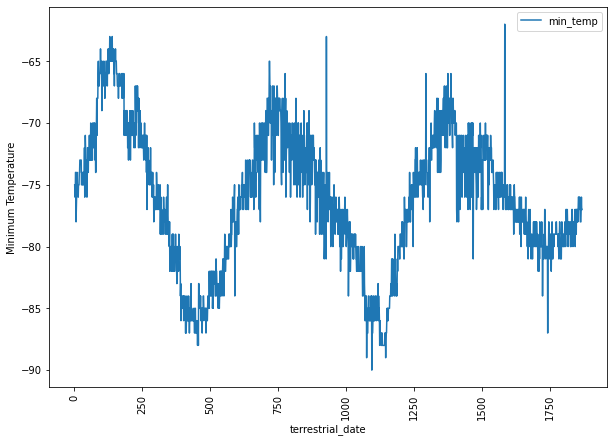

In [63]:
#Visually estimate the result by plotting the daily minimum temperature.
mars_df.plot(y="min_temp",rot=90,figsize=(10,7))
plt.xlabel("terrestrial_date")
plt.ylabel("Minimum Temperature")

In [65]:
# Write the data to a CSV
mars_df.drop(columns = 'pressure')
mars_df.to_csv('Resources\mars_dataframe.csv',encoding='utf-8')

In [66]:
browser.quit()